
## Assignment List (80 points)
**Make sure you excute every cell in order, and reserve the outputs of every cell.**
1. Transform and plot image. (15 points)
2. Data loading. (10 points)
3. Train the baseline model and plot the learning curve. (15 points)

4. Comparison and analysis (20 points)
    * Compare the training results of 5, 20, and 50 epochs.
    * Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 
    * Try a different data_transform function 
5. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results? (10 points)
6. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) and share your prediction. (10 points)
    * Does the model you trained get it right? 
    * If not, what do you think you could do to improve it?
    
## Advanced options (20 points)
**Make sure you excute every cell in order, and reserve the outputs of every cell.**
- A1: Train a complicated model on the dataset (ResNet18) (10 points) \
    **Remenber to resize the image data and recall dataloader**.
- A2: Compare the performance of a simple model (provided by the template) and the complicated model. (5 points)
      Plot learning curves in the same figure axes
- A3: Usage of git version control (5 points)
      Git add, git commit, git log, insert a screenshot within this notebook

### Deadline: 11.59 pm 16/01/2023
### Submit a rar/zip folder to brightspace under the unit of **Machine Learning for Media Production**


## 0. Importing PyTorch and setting up device-agnostic code

In [1]:
import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.__version__, device


('1.13.0+cu117', 'cuda')

## 1. Get data
[Food101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) is popular computer vision benchmark as it contains 1000 images of 101 different kinds of foods, totaling 101,000 images (75,750 train and 25,250 test).
In this assignment, only 3 classes are used to form a small classification dataset, it contains pizza, steak and sushi.
And instead of 1,000 images per class, ervey image class only has 100 images(10%).


In [2]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/lizhiqihhh/AIM-MLWorkshop/raw/main/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [3]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## Task 1

1. Transform training dataset and testing dataset.
2. Plot images 


## 1.1 Transforming data


In [4]:
# import libraries and packages
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

In [5]:
# Write transform for image
data_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.Resize([64,64])])
# Step 1: Resize the images to 64x64
    # Resize the images to 64x64x3 (64 height, 64 width, 3 color channels)
    
    # Step 2: Turn the image into a torch.Tensor
    # converts all pixel values from 0-255 to be between 0-1  
    
    # Step 3: RandomHorizontalFlip---Flip the images randomly on the horizontal p = probability of flip, 0.5 = 50% chance 

In [6]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # root should be the target folder of images
                                  transform=transforms.Compose([transforms.ToTensor(),
                                                                transforms.RandomHorizontalFlip(),
                                                                transforms.Resize([64,64])]), # transform should be a set of transform functions to perform on images
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, # it should be the folder of test data 
                                 transform=transforms.Compose([transforms.ToTensor(),
                                                               transforms.RandomHorizontalFlip(),
                                                               transforms.Resize([64,64])]) # same with transform applied to train_data
                                )
print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               ToTensor()
               RandomHorizontalFlip(p=0.5)
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=None)
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               ToTensor()
               RandomHorizontalFlip(p=0.5)
               Resize(size=[64, 64], interpolation=bilinear, max_size=None, antialias=None)
           )


In [7]:
len(train_data), len(test_data)

(225, 75)

## 1.2 Plot the transformed image
`Plot_imgs` and `plot_transformed_images` are defined in plot.py, complete the contents in plot.py 

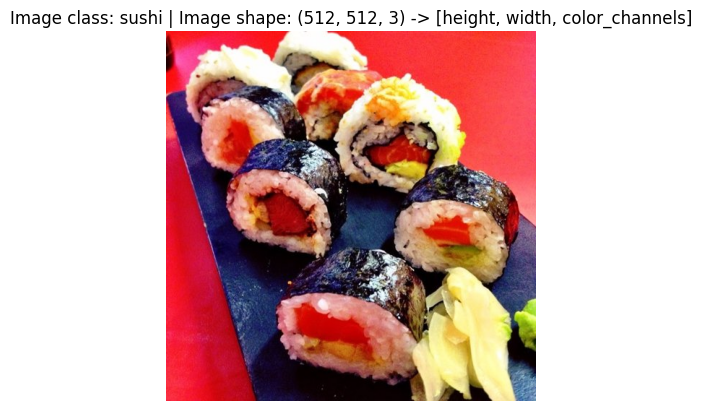

In [8]:

from pathlib import Path
from plot import Plot_imgs

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# Plot an image using matplotli





# Please complete the plot.py before use this plotting function
Plot_imgs(image_path)


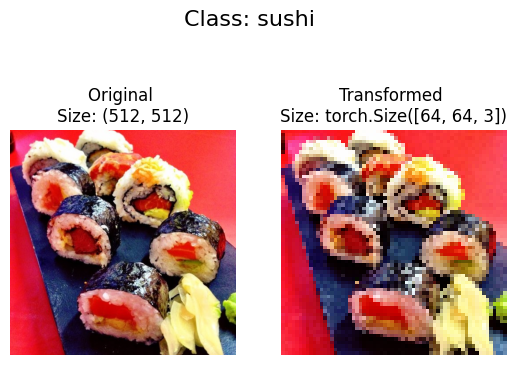

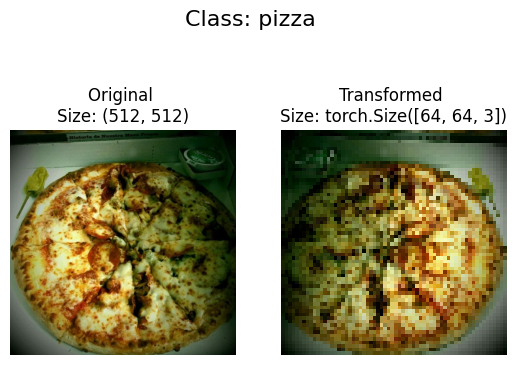

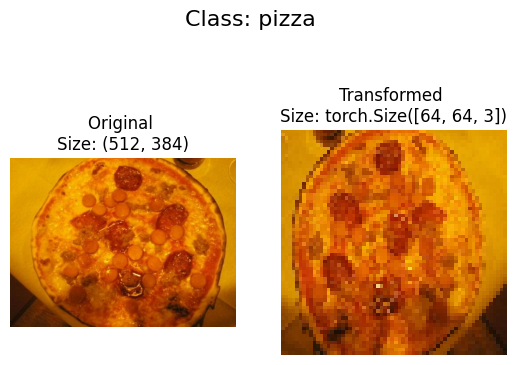

In [9]:
from plot import plot_transformed_images
image_path_list = list(image_path.glob("*/*/*.jpg"))
plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [10]:
# Get class names as a list
class_names = train_data.classes
# Try index on the `train_data` and `test_data` `Dataset`'s to find samples and their target labels.
img, label = train_data[0][0], train_data[0][1]
# Print the shape/content/datatype of img and label
class_to_idx = train_data.class_to_idx
print(class_names)
print(class_to_idx)
train_data.targets, train_data

['pizza', 'steak', 'sushi']
{'pizza': 0, 'steak': 1, 'sushi': 2}


([0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,


In [11]:
print(f"Image shape: {img.shape} -> [color_channels, height, width]") 
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image label: pizza


Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

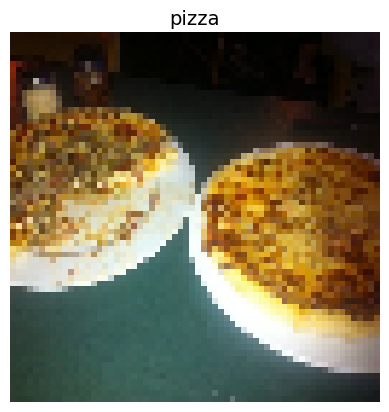

In [12]:
import matplotlib.pyplot as plt
from PIL import Image
img_permute = img.permute(1, 2, 0)

# Print out diGPT model or paper use BERTfferent shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")


# ---------------Plot the permuted image-------------
plt.figure()
plt.imshow(img_permute)
# ---------------End of code------------------------
plt.axis("off")
plt.title(class_names[label], fontsize=14)

## 1.3 Turn loaded images into `DataLoader`'s

## Task 2: Turn train and test Datasets into DataLoaders (10 points)

In [13]:
from torch.utils.data import DataLoader
BATCH_SIZE = 5
train_dataloader = DataLoader(train_data,BATCH_SIZE,shuffle=True) # shuffle training data

test_dataloader = DataLoader(test_data,BATCH_SIZE,shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f2a4c6530a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f2a4c653a60>)

In [14]:
# Load a batch of images in the training dataset
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([5, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([5])


`display_random_images` is defined in plot.py, please complete the contents in `plot.py`

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


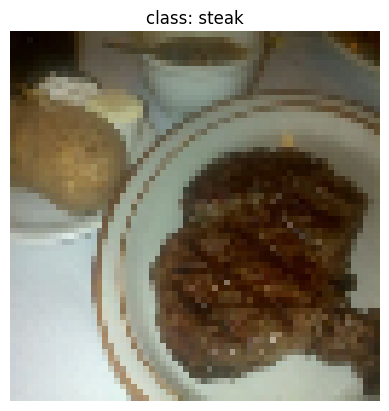

In [15]:
# Display random images from Dataset
from plot import display_random_images
display_random_images(train_data, 
                      n=12, 
                      classes=class_names,
                      seed=None)

## Task 3 Model_0 training
### Task 3.1 Train the baseline model TinyVGG


In [16]:
from TinyVGG import TinyVGG # import the model from TinyVGG.py
torch.manual_seed(42)

# --------------Initialize the TinyVGG model--------------
'''
    Parameters: input_shape
                hidden_units
                output_shape
'''
model_0 = TinyVGG(3,10,3).to(device) 
# -------------------  End of code -----------------------

model_0 # Print the model info here!

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_fea

In [17]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0212,  0.0189, -0.0163]], device='cuda:0')

Output prediction probabilities:
tensor([[0.3377, 0.3370, 0.3253]], device='cuda:0')

Output prediction label:
tensor([0], device='cuda:0')

Actual label:
0


In [18]:
# Load the training function from TinyVGG.py
from TinyVGG import train
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# ------------------------- Train model_0 --------------------------
# Fill in the parentheses with parameters needed in the train function
model_0_results = train(model_0,train_dataloader,test_dataloader,optimizer,loss_fn)
# -------------------------  End of code  --------------------------
# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1050 | train_acc: 0.2978 | test_loss: 1.0960 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.0996 | train_acc: 0.3200 | test_loss: 1.0982 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.0984 | train_acc: 0.3556 | test_loss: 1.0974 | test_acc: 0.3733
Epoch: 4 | train_loss: 1.0432 | train_acc: 0.5378 | test_loss: 1.0500 | test_acc: 0.4400
Epoch: 5 | train_loss: 0.9363 | train_acc: 0.6000 | test_loss: 1.0772 | test_acc: 0.4267
Total training time: 4.346 seconds


### Task 3.2: Plot the loss curves of Model_0

From the print outs of our `model_0` training, it didn't look like it did too well.

Create a function to plot the values in the `model_0_results` dictionary.

In [19]:
from typing import Tuple, Dict, List
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    train_loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    train_accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # --------------- Complete the following lines --------------
    # Plot loss, please include label, title, and legend in the figure
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss,label='train_loss')   # plot epochs, train_loss
    plt.plot(epochs, test_loss,label='test_loss')   # plot epochs, test_loss
    plt.title('loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs,train_accuracy,label='train_acc') # plot epochs, train_accuracy, add label
    plt.plot(epochs,test_accuracy,label='test_acc') # plot epochs, test_accuracy, add label
    plt.title('acc')
    plt.xlabel('epochs')
    plt.ylabel('acc')
    plt.legend()
    # ---------------------- End of codes -----------------------

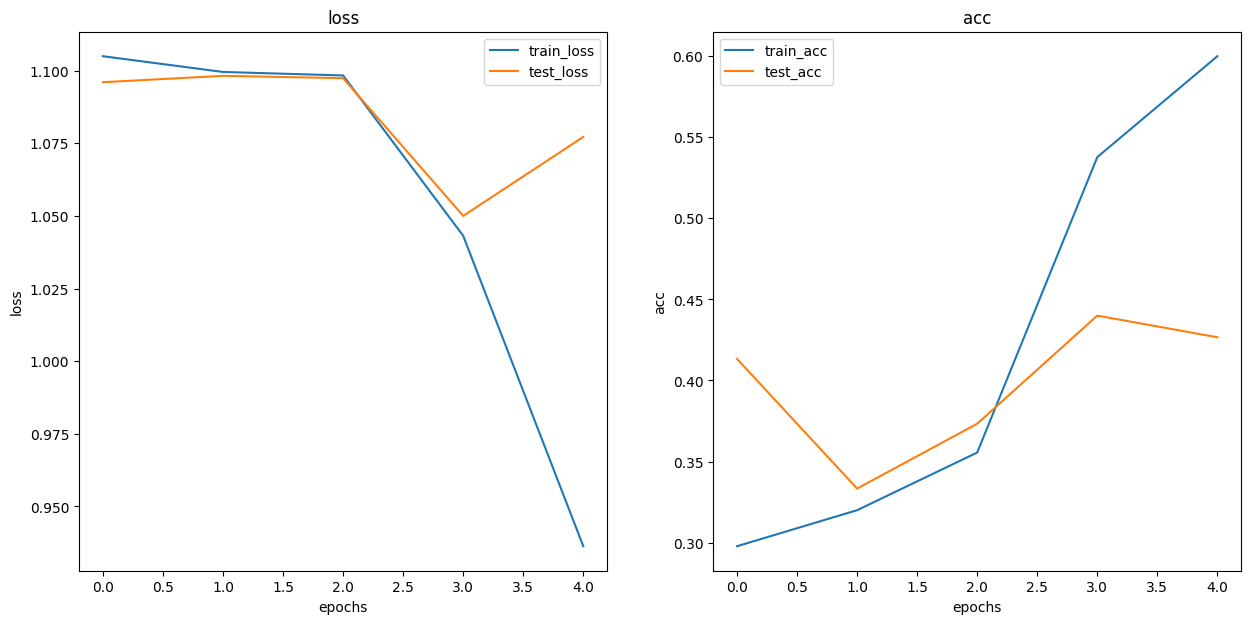

In [20]:
plot_loss_curves(model_0_results)

`torchinfo` comes with a `summary()` method that takes a PyTorch model as well as an `input_shape` and returns what happens as a tensor moves through your model.


In [21]:
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

## Task 4: Comparison and analysis


### Task 4.1 Try different epochs


In [22]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# create a new instance of TinyVGG model
model_e_5 = TinyVGG(3,10,3).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_e_5.parameters(), lr=0.001)

model_e_5_results = train(model_e_5,train_dataloader,test_dataloader,optimizer,loss_fn)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1027 | train_acc: 0.3111 | test_loss: 1.0963 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.1006 | train_acc: 0.3467 | test_loss: 1.1021 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.1038 | train_acc: 0.2711 | test_loss: 1.0955 | test_acc: 0.4133
Epoch: 4 | train_loss: 1.1001 | train_acc: 0.3200 | test_loss: 1.0930 | test_acc: 0.4133
Epoch: 5 | train_loss: 1.0992 | train_acc: 0.2933 | test_loss: 1.0973 | test_acc: 0.4133


In [23]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_e_20 = TinyVGG(3,10,3).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_e_20.parameters(), lr=0.001)

model_e_20_results = train(model_e_20,train_dataloader,test_dataloader,optimizer,loss_fn,20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1027 | train_acc: 0.3111 | test_loss: 1.0963 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.1006 | train_acc: 0.3467 | test_loss: 1.1021 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.1028 | train_acc: 0.2711 | test_loss: 1.0954 | test_acc: 0.4133
Epoch: 4 | train_loss: 1.0997 | train_acc: 0.3200 | test_loss: 1.0961 | test_acc: 0.4133
Epoch: 5 | train_loss: 1.0993 | train_acc: 0.2844 | test_loss: 1.0970 | test_acc: 0.4133
Epoch: 6 | train_loss: 1.0991 | train_acc: 0.3200 | test_loss: 1.0969 | test_acc: 0.3867
Epoch: 7 | train_loss: 1.0988 | train_acc: 0.3067 | test_loss: 1.0984 | test_acc: 0.3333
Epoch: 8 | train_loss: 1.0992 | train_acc: 0.3289 | test_loss: 1.0996 | test_acc: 0.2533
Epoch: 9 | train_loss: 1.0959 | train_acc: 0.3644 | test_loss: 1.0676 | test_acc: 0.4000
Epoch: 10 | train_loss: 1.0464 | train_acc: 0.4667 | test_loss: 1.0254 | test_acc: 0.4267
Epoch: 11 | train_loss: 0.9118 | train_acc: 0.5600 | test_loss: 1.0356 | test_acc: 0.4000
Epoch: 12 | train_l

In [24]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_e_50 = TinyVGG(3,10,3).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_e_50.parameters(), lr=0.001)

model_e_50_results = train(model_e_50,train_dataloader,test_dataloader,optimizer,loss_fn,50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1027 | train_acc: 0.3111 | test_loss: 1.0967 | test_acc: 0.4133
Epoch: 2 | train_loss: 1.1004 | train_acc: 0.3378 | test_loss: 1.1015 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.1025 | train_acc: 0.2711 | test_loss: 1.0954 | test_acc: 0.4133
Epoch: 4 | train_loss: 1.0995 | train_acc: 0.3200 | test_loss: 1.0961 | test_acc: 0.4133
Epoch: 5 | train_loss: 1.0992 | train_acc: 0.3200 | test_loss: 1.0965 | test_acc: 0.4133
Epoch: 6 | train_loss: 1.0991 | train_acc: 0.3200 | test_loss: 1.0966 | test_acc: 0.4133
Epoch: 7 | train_loss: 1.0989 | train_acc: 0.3200 | test_loss: 1.0973 | test_acc: 0.4133
Epoch: 8 | train_loss: 1.0989 | train_acc: 0.3200 | test_loss: 1.0980 | test_acc: 0.3333
Epoch: 9 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.0984 | test_acc: 0.3333
Epoch: 10 | train_loss: 1.0988 | train_acc: 0.3467 | test_loss: 1.0983 | test_acc: 0.3333
Epoch: 11 | train_loss: 1.0986 | train_acc: 0.3467 | test_loss: 1.0985 | test_acc: 0.3333
Epoch: 12 | train_l

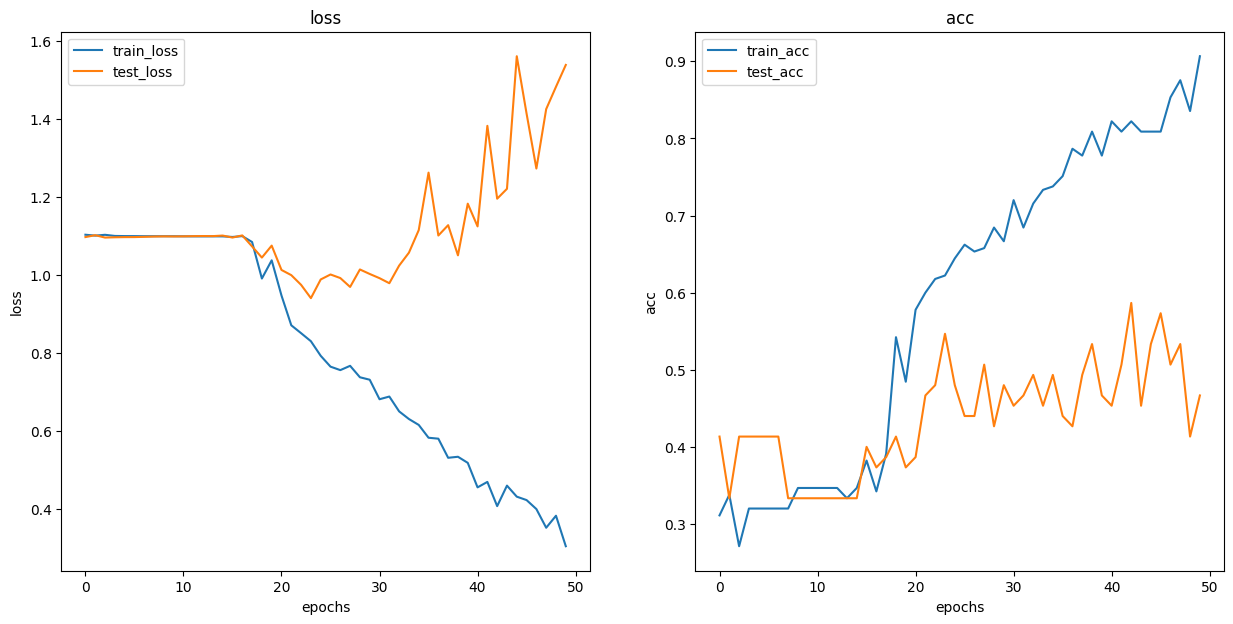

In [25]:

plot_loss_curves(model_e_50_results)

### Compare: Print the differences

In [26]:
import pandas as pd 
model_compare_1 = pd.DataFrame(model_e_5_results)
model_compare_2 = pd.DataFrame(model_e_20_results)
model_compare_3 = pd.DataFrame(model_e_50_results)

model_compare_1

,train_loss,train_acc,test_loss,test_acc
0,1.102687,0.311111,1.096343,0.413333
1,1.100554,0.346667,1.102104,0.333333
2,1.103842,0.271111,1.095479,0.413333
3,1.100062,0.320000,1.093023,0.413333
4,1.099192,0.293333,1.097260,0.413333


### Analysis: What you find and how to improve model_0's performance?

**Your answer**:

### Task 4.2 Try different data transform functions

In [29]:
#
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
# --------- Create training transform with TrivialAugment ---------
# TrivialAugment: Tuning-Free Yet State-of-the-Art Data Augmentation (source:https://arxiv.org/abs/2103.10158)
train_transform_trivial_augment = transforms.Compose([
    # Resize
transforms.ToTensor(),

transforms.Resize([64,64]),
    # RandomHorizontalFlip
transforms.RandomHorizontalFlip(),
    # TrivialAugment
transforms.TrivialAugmentWide(fill=20),
    # ToTensor
transforms.ToTensor()    
])

train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)

train_dataloader_augmented = DataLoader(train_data,BATCH_SIZE,shuffle=True)
test_dataloader_simple = DataLoader(test_data,BATCH_SIZE,shuffle=False)
# ---------------------- End of code ----------------------

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f2a4c65cbb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f2a4c653a60>)

In [30]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(3,10,3).to(device)
model_1 # print model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_fea

In [31]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# ------------------------- Train model_1 ----------------------------
# Fill in the parentheses with parameters needed in the train function
model_1_results = train(model_1,train_dataloader_augmented ,test_dataloader,optimizer,loss_fn,NUM_EPOCHS)
# ------------------------- End of model_1 ---------------------------
# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1016 | train_acc: 0.2500 | test_loss: 1.0983 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.1015 | train_acc: 0.3047 | test_loss: 1.0980 | test_acc: 0.3333
Epoch: 3 | train_loss: 1.0929 | train_acc: 0.4258 | test_loss: 1.0949 | test_acc: 0.3333
Epoch: 4 | train_loss: 1.1096 | train_acc: 0.3047 | test_loss: 1.0960 | test_acc: 0.3333
Epoch: 5 | train_loss: 1.0939 | train_acc: 0.4258 | test_loss: 1.1010 | test_acc: 0.3333
Total training time: 3.901 seconds


## Task 5: Double the number of hidden units in your model and train it for 20 epochs

In [32]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = TinyVGG(3,20,3).to(device) # use 20 hidden units instead of 10

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

model_2_results = train(model_2,train_dataloader_augmented ,test_dataloader,optimizer,loss_fn,20) # train for 20 epochs

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1015 | train_acc: 0.2852 | test_loss: 1.0974 | test_acc: 0.3333
Epoch: 2 | train_loss: 1.0954 | train_acc: 0.4102 | test_loss: 1.0931 | test_acc: 0.4133
Epoch: 3 | train_loss: 1.1017 | train_acc: 0.2812 | test_loss: 1.0905 | test_acc: 0.4133
Epoch: 4 | train_loss: 1.0978 | train_acc: 0.2812 | test_loss: 1.0914 | test_acc: 0.4133
Epoch: 5 | train_loss: 1.1016 | train_acc: 0.3320 | test_loss: 1.0935 | test_acc: 0.4267
Epoch: 6 | train_loss: 1.1059 | train_acc: 0.3203 | test_loss: 1.0961 | test_acc: 0.3200
Epoch: 7 | train_loss: 1.0564 | train_acc: 0.5664 | test_loss: 1.0816 | test_acc: 0.3600
Epoch: 8 | train_loss: 1.0663 | train_acc: 0.4062 | test_loss: 1.0537 | test_acc: 0.3600
Epoch: 9 | train_loss: 0.8982 | train_acc: 0.6172 | test_loss: 1.0997 | test_acc: 0.4267
Epoch: 10 | train_loss: 1.0043 | train_acc: 0.5078 | test_loss: 1.2634 | test_acc: 0.4000
Epoch: 11 | train_loss: 1.0134 | train_acc: 0.4883 | test_loss: 1.0084 | test_acc: 0.4800
Epoch: 12 | train_l

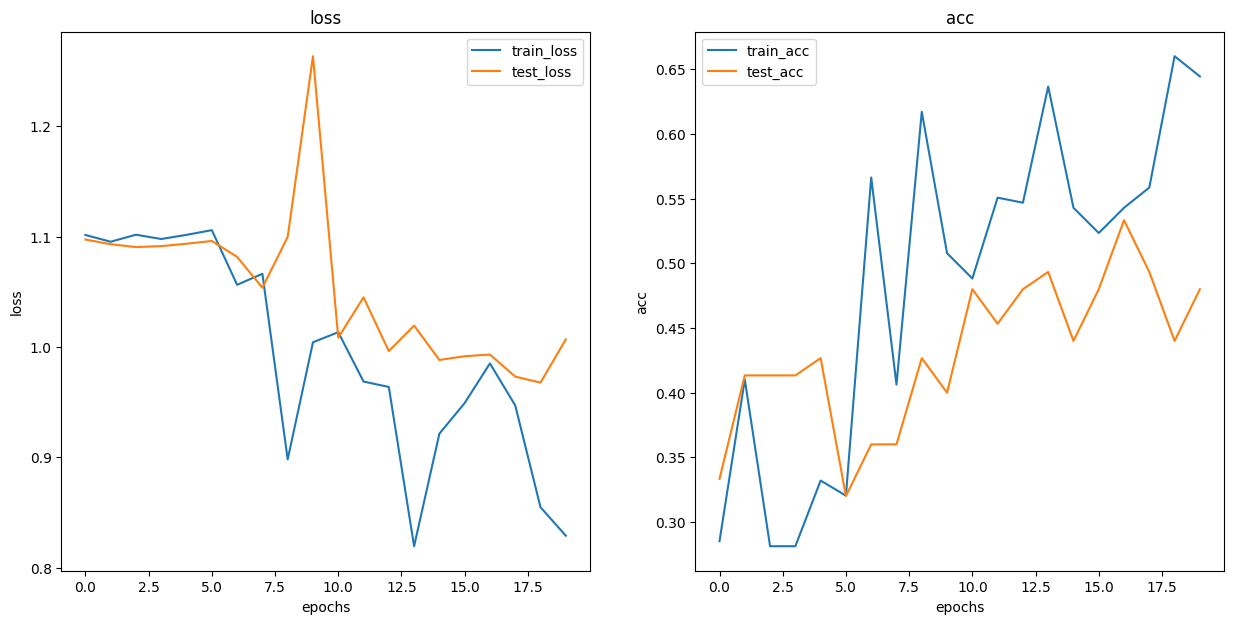

In [33]:
plot_loss_curves(model_2_results)

## Task 6: Make prediction on a custom image based on model_2


In [34]:
# Read a custom image from img_path and represent it as a tensor datatype
import torchvision

img_path = './data/'
custom_image = img_path + "img.jpeg"
img = torchvision.io.read_image(custom_image)

Resized image shape: 
 torch.Size([3, 64, 64])
Add batch dim: 
 torch.Size([1, 3, 64, 64])


(-0.5, 63.5, 63.5, -0.5)

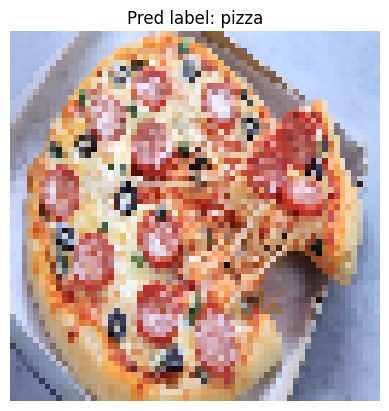

In [35]:
# Make a prediction on the image, put model_2 in eval mode
model_2.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.
  # -------------------- Complete the following lines ---------------------
  # Resize image to 64x64
  resize = transforms.Resize([64,64])
  img = resize(img)
  print('Resized image shape: \n',img.shape)
  # Turn image in single batch and pass to target device
  # add an additional dimension to img using unsqueeze()
  batch_img = img.unsqueeze(0).to(device) # modify this line!!!
  print('Add batch dim: \n', batch_img.shape)
  # Predict on image
  y_pred_logit = model_2(batch_img) 
  # ---------------------   End of code    ------------------------------
  # Convert pred logit to pred label
  pred_label = torch.argmax(y_pred_logit, dim=1)

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False)
     


### Analysis
Does the model you trained get it right?
If not, how to improve it?\
**Your answer:**

yeah!在先不考虑学习率大小的情况下 epoch 太少了吧，没啥效果。剩下是对学习率的调整。好吧，结果不太好的主要原因应该是数据集太小了。

## Advanced tasks
### A1: Train a complicated model (Use ResNet18 as an example) (10 points)

### Read `Resnet18_pytorch.py` and complete the model file
> If you finish `Resnet18_pytorch.py` correctly, run the following line will generate a vector with shape = ([1,3])

In [36]:
%%bash
python3.9 Resnet18_pytorch.py

Dimensions of the last convolutional feature map:  torch.Size([1, 512, 7, 7])
torch.Size([1, 3])Output feature size.


In [62]:
from Resnet18_pytorch import ResNet, BasicBlock
torch.manual_seed(42)
model_resnet = ResNet(img_channels=3, num_layers=18, block=BasicBlock, num_classes=3).to(device)
model_resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Preparing train dataloader and test dataloader


In [63]:
BATCH_SIZE=32
NUM_WORKERS=2
# ----- Complete the following transform functions -----
train_transform_augment = transforms.Compose([transforms.ToTensor(),
                                              transforms.RandomHorizontalFlip(),
                                              transforms.Resize([64,64])
   
                                             ])
#  ----------------  End of code --------------------
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_augment)
train_dataloader_resnet = DataLoader(train_data,BATCH_SIZE,shuffle=True)

test_dataloader_simple = DataLoader(test_data,BATCH_SIZE,shuffle=False)

train_dataloader_resnet, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f2a708f0130>,
 <torch.utils.data.dataloader.DataLoader at 0x7f2a4c653a60>)

#### Start training

In [64]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_resnet.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model
model_resnet_results = train(model_resnet,train_dataloader_resnet,test_dataloader,optimizer,loss_fn,NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Dimensions of the last convolutional feature map:  torch.Size([32, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.Size([32, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.Size([32, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.Size([32, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.Size([32, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.Size([32, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.Size([32, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.Size([1, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.Size([5, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.Size([5, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.Size([5, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.Size([5, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.

Dimensions of the last convolutional feature map:  torch.Size([5, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.Size([5, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.Size([5, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.Size([5, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.Size([5, 512, 2, 2])
Dimensions of the last convolutional feature map:  torch.Size([5, 512, 2, 2])
Epoch: 5 | train_loss: 0.8970 | train_acc: 0.6250 | test_loss: 1.9737 | test_acc: 0.4667
Total training time: 5.418 seconds


### A2: Compare model performance (5 points)
Choose a previous model used in **Task 3** (model_0) or **Task 4** (model_1) to compare with ResNet18 model

In [65]:
from torchinfo import summary
summary(model_resnet, input_size=[1, 3, 224, 224]) # do a test pass through of an example input size

Dimensions of the last convolutional feature map:  torch.Size([1, 512, 7, 7])


Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 3]                    --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│

### Plot the train_loss and test_loss of model_resnet and a previous model using subplot function

In [66]:
model_resnet_results

{'train_loss': [1.2221213355660439,
  0.904192216694355,
  0.812735341489315,
  0.9364437535405159,
  0.8970395550131798],
 'train_acc': [0.38671875, 0.62890625, 0.58984375, 0.59765625, 0.625],
 'test_loss': [1.080330240726471,
  0.9926774561405182,
  1.248857468366623,
  1.6050138572851818,
  1.9736606083810329],
 'test_acc': [0.36000000000000004,
  0.4133333333333334,
  0.5333333333333333,
  0.49333333333333335,
  0.4666666666666667]}

In [67]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results) # Or model_1

model_resnet_df = pd.DataFrame(model_resnet_results)
model_0_df,model_resnet_df

(   train_loss  train_acc  test_loss  test_acc
 0    1.104978   0.297778   1.096033  0.413333
 1    1.099560   0.320000   1.098229  0.333333
 2    1.098360   0.355556   1.097416  0.373333
 3    1.043160   0.537778   1.050010  0.440000
 4    0.936287   0.600000   1.077190  0.426667,
    train_loss  train_acc  test_loss  test_acc
 0    1.222121   0.386719   1.080330  0.360000
 1    0.904192   0.628906   0.992677  0.413333
 2    0.812735   0.589844   1.248857  0.533333
 3    0.936444   0.597656   1.605014  0.493333
 4    0.897040   0.625000   1.973661  0.466667)

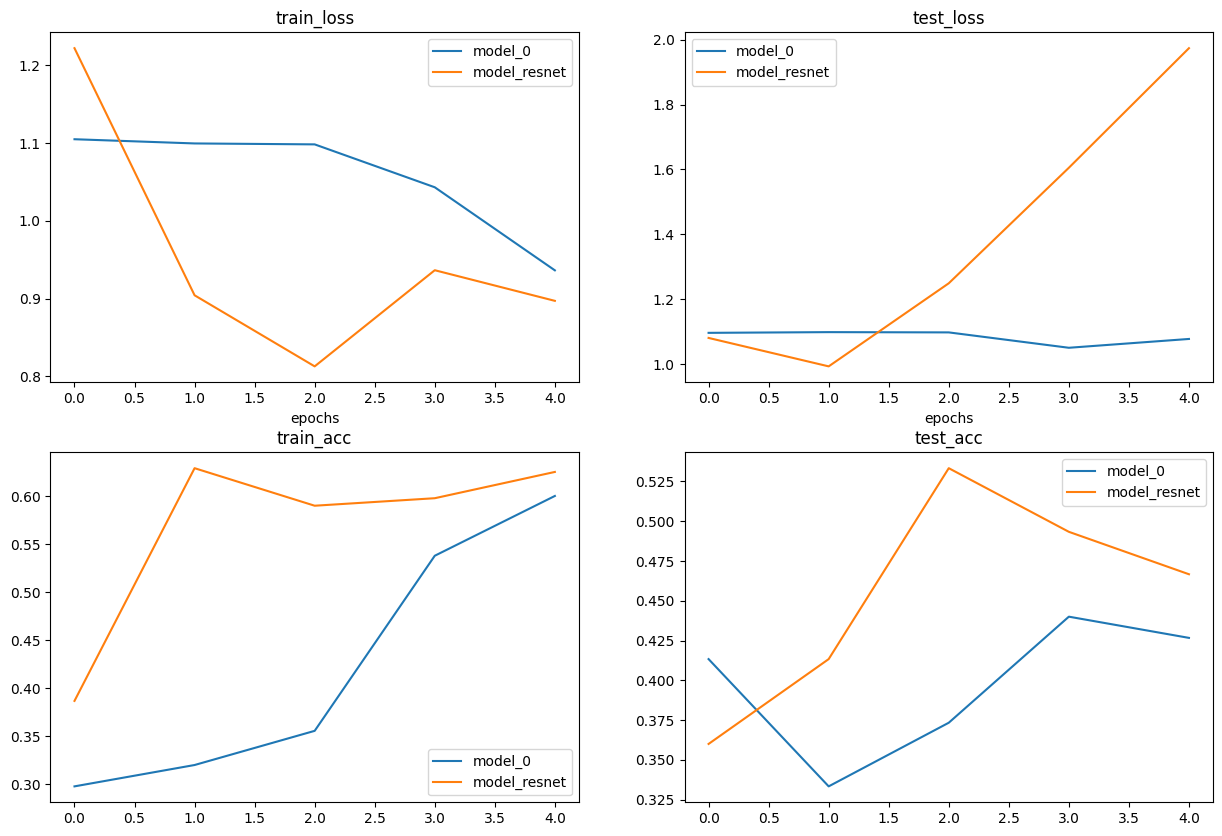

In [68]:
# ------ Complete subplot functions in the following lines -------
plt.figure(figsize=(15, 10))

#range(len(model_0_df))
# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss with label, title, legend
plt.subplot(2, 2, 1)
plt.plot(epochs,model_0_df['train_loss'],label='model_0')
plt.plot(epochs,model_resnet_df['train_loss'] ,label='model_resnet')   
plt.title('train_loss')
plt.xlabel('epochs')
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs,model_0_df['test_loss'],label='model_0')
plt.plot(epochs, model_resnet_df['test_loss'],label='model_resnet')   
plt.title('test_loss')
plt.xlabel('epochs')
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs,model_0_df['train_acc'],label='model_0')
plt.plot(epochs, model_resnet_df['train_acc'],label='model_resnet')
plt.title('train_acc') 
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs,model_0_df['test_acc'],label='model_0')
plt.plot(epochs, model_resnet_df['test_acc'],label='model_resnet')
plt.title('test_acc') 
plt.legend()


### A3: Git version control (5 points)
Please insert an image in the cell to show your git log

### Git version control advices
1. Create a remote repo, upload this notebote to the repo\
   **Take a screenshot of the inital status**
2. git clone (ssh link of the repo)
3. Make some modifications to the files
4. git add .
5. git commit -m "leave some message here"
6. git push
7. git log
8. check the remote repo, **Take a screenshot after git push operations**

In [ ]:
from IPython.display import Image
Image("./git-staging-workflow.png",width=900,height=500)

In [ ]:
Image("git pull.png",width=994,height=655)

In [ ]:
Image("git merge.png")

In [ ]:
Image("git push steps.png")

In [ ]:
Image("before.png")

In [ ]:
Image("after.png")

In [ ]:
Image("gitlog.png")